# Understanding Stationarity in Time Series Analysis

Welcome to this exploration of stationarity in time series analysis, a crucial concept that supports many of the statistical tools and methods used in forecasting and analyzing time series.

## Defining Time Series Data

A time series is simply a list of data points ordered in time. This kind of data is everywhere, from changing stock prices, to daily weather changes, to fluctuations in interest rates over several months.

## Characteristics of a Stationary Time Series:

1. **Consistent Mean μ:** The series showcases a stable average value over its duration, without trend-induced drifts.
2. **Uniform Variance σ:** Fluctuations around the series mean are consistent, indicating unchanging volatility.
3. **Absence of Seasonality:** The data does not contain periodic patterns or cycles.

## Prerequisites in Python

Our journey through time series data will leverage several Python libraries, notably:

- **`pandas`:** A great tool for working with data, it gives you something like Excel sheets in your code to help you organize and manage your information easily.
- **`numpy`:** A foundation for mathematical and numerical operations, providing a vast array of functions for array processing.
- **`matplotlib`:** A library we'll use to create graphs, helping us see our data visually.
- **`statsmodels`:** Essential for conducting statistical tests. This includes tools for conducting the Dickey-Fuller test, which we'll explore as a method for determining stationarity in time series data.

These tools will be crucial in our analysis

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Series A: A Stationary Example

A normally distributed time series, where each sample is drawn from a normal distribution with constant mean (μ) and standard deviation (σ), exhibits stationarity. This is because the underlying distribution that generates the data remains the same throughout the series.

Let's create a sample time series (`Series A`) to illustrate this concept. We'll use (`numpy` and `pandas`) for data generation and processing.

You'll notice that with any change you make in the (`User Inputs`) section, every single series generated will be stationary, this is because the underlying distribution is the same. Which means μ & σ remain the same throughout time.

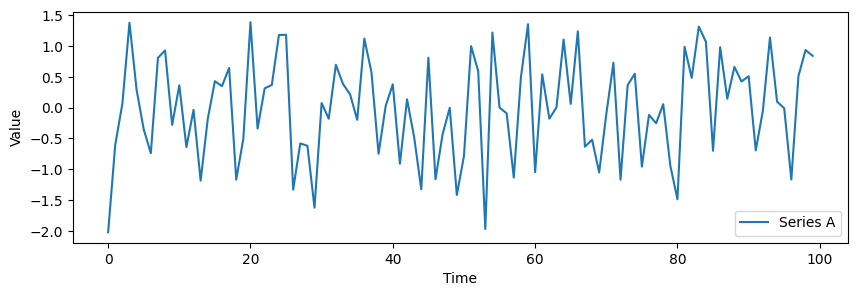

In [17]:
""" User Inputs """

mu = 0
sigma = 1
Total_Plots = 100 #This is the total number of plots generated

""" Generating Plots for Series A """

#Function to generate a random plot
def NormalDistributionRandomPlot(mu,sigma):
    return np.random.normal(mu, sigma)

#Creating an empty datframe by using Total_plots as the number of cells to generate
SeriesA = pd.DataFrame([None]*Total_Plots)

#Populating dataframe with values from NormalDistributionRandomPlot()
for i in range(0,Total_Plots):
    SeriesA.iloc[i,0] = NormalDistributionRandomPlot(mu,sigma)

""" Plotting a graph for Series A """

plt.figure(figsize=(10, 3)) #You can change the size of the plot output here
plt.plot(SeriesA)
plt.legend(['Series A'])
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# Series B: Non-Stationary with Time-Varying Trend

Series A demonstrated a stationary scenario with constant mean (μ) and standard deviation (σ). Now, let's explore a non-stationary case (Series B) by introducing a time-based trend into the Series A graph. We'll achieve this by manipulating the mean (μ) and/or standard deviation (σ) over time.

# Introducing the Time Trend:
There are multiple ways to implement a time-based trend. Here is a simple approach:

**`Linear Trend`**: We can define a function that gradually increases or decreases μ and/or σ over time, simulating a linear trend.



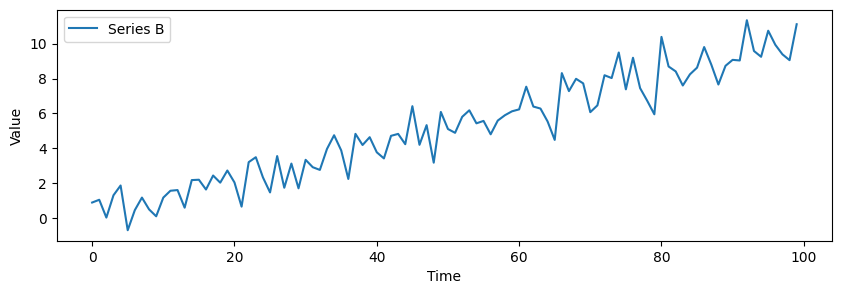

In [18]:
""" User Inputs """

mu = 0
sigma = 1
Total_Plots=100
Time_Factor=0.1 #This will be added to Mu every simulation. For instance, if Time_Factor = 0.1. Mu will keep on gradually increasing 0.1 each time

""" Generating Plots for Series B """

#Creating an empty datframe by using Total_plots as the number of cells to generate
SeriesB = pd.DataFrame([None]*Total_Plots)

#Populating dataframe with values from NormalDistributionRandomPlot(), recall this function was created in the previous cell
Time_Factor_Accumulated = Time_Factor
for i in range(0,Total_Plots):
    SeriesB.iloc[i,0] = NormalDistributionRandomPlot(mu+Time_Factor_Accumulated,sigma) #Notice how a Time Factor is added to Mu
    Time_Factor_Accumulated=Time_Factor_Accumulated+Time_Factor #This incremenets the Time factor, so every iteration the Time factor added to Mu is incremented

""" Plotting a graph for Series B """

plt.figure(figsize=(10, 3)) #You can change the size of the plot output here
plt.plot(SeriesB)
plt.legend(['Series B'])
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

Non-Stationary Time Series, like the example above, pose a significant challenge for statistical testing. Many statistical tests assume the time series they're analyzing is **stationary**. By inputting data from a **non-stationary** time series into these tests, the results you get might be entirely misleading—essentially, *garbage in, garbage out*.

`This issue becomes apparent when we attempt to visualize the situation by plotting a horizontal line representing the mean (μ) across the entire time series.`

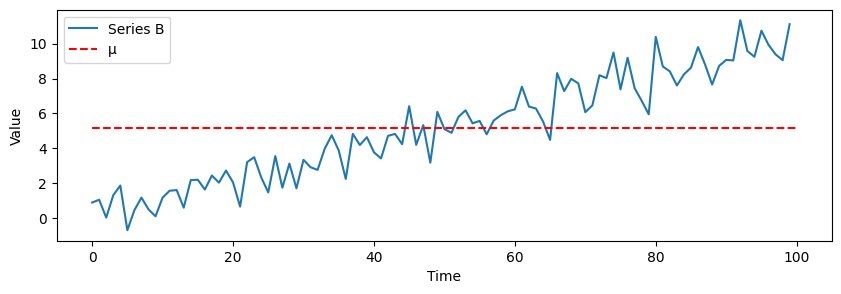

In [19]:
""" Calculating Series B Mean Value (μ) """

SeriesB_Mean =  np.mean(SeriesB)

""" Plotting Mean Value into Series B Graph"""

plt.figure(figsize=(10, 3)) #You can change the size of the plot output here
plt.plot(SeriesB)
plt.hlines(SeriesB_Mean,0,len(SeriesB),colors="r",linestyles="dashed")
plt.legend(['Series B','μ'])
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

By examining the graph above, it becomes clear that the time series is not stationary, as the Mean Value changes over time.

If we calculate the Mean value at two different times, we observe that μ never stays the same, which categorically classifies this time series as non-stationary.

In this case, it was easy to identify the non-stationarity of the time series visually, but that's not always the cas. The next series we will explore may visually appear stationary, yet it might actually not be stationary.

# Series C: The Mystery Series - Stationary or Not?

In the realm of time series analysis, appearances can be deceiving. Some time series might visually seem stationary, maintaining a consistent mean and variance over time. However, upon closer examination, they reveal underlying variations that challenge this assumption. The question then arises: how do we identify and account for these subtle nuances to accurately determine the stationarity of a series?

# Introducing the Seasonal Variation:
To explore the complexities of seemingly stationary time series, we introduce seasonal variations to our analysis. These variations can significantly affect the perceived stationarity of a series, even when they are not immediately obvious from a visual inspection of the data.

**`Seasonal Mean Variation`**: In this approach, we add a seasonal factor to mean value (μ), employing a simple yet effective method: the sine function. By using `sin(i)`, where `i` is a continuously incrementing number, we inject a periodic fluctuation into μ. This subtle seasonal variation can make the series appear stationary at a glance, but a more thorough analysis might reveal it to be otherwise.

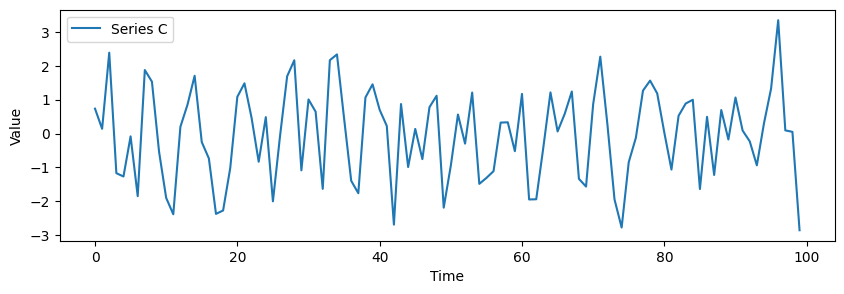

In [20]:
""" User Inputs """

mu = 0
sigma = 1
Total_Plots=100

""" Generating Plots for Series C """

#Creating an empty datframe by using Total_plots as the number of cells to generate
SeriesC = pd.DataFrame([None]*Total_Plots)

#Populating dataframe with values from NormalDistributionRandomPlot(), recall this function was created in the previous cell
for i in range(0,Total_Plots):
    SeriesC.iloc[i,0] = NormalDistributionRandomPlot(mu+np.sin(i),sigma) #Notice how sin(i) is added to Mu, this allows for a periodic fluctuation in μ

""" Plotting a graph for Series C """

plt.figure(figsize=(10, 3)) #You can change the size of the plot output here
plt.plot(SeriesC)
plt.legend(['Series C'])
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

As you can observe in the graph above, it visually appears to be stationary, even after we intentionally introduced a periodic fluctuation into the mean value (μ).

Reflecting on the earlier question we posed to ourselves, `"How do we identify and account for these subtle nuances to accurately determine the stationarity of a series?"`

The answer lies in employing a hypothesis statistical test. One such test is the **`Augmented Dickey-Fuller test`**, which is designed to test for a unit root in a time series.

**`Unit root`**: A concept referring to the characteristic of a time series where a change at any point can cause a permanent shift in the level of the series. In simpler terms, if a time series has a unit root, it means that the series is influenced by its past values in such a way that shocks to the series have a lasting effect, rather than dissipating over time. This property makes it crucial to test for a unit root to determine the true nature of the time series, especially when visual inspection might suggest stationarity.


# Hypothesis Testing - Augmented Dickey-Fuller Test

To effectively evaluate the stationarity of our time series data, we'll craft a function specifically for executing the Augmented Dickey-Fuller (ADF) test. This method enables us to neatly and consistently test Series A, Series B, and Series C, offering comparative insights with precision.

**Null Hypothesis (H0):** The time series has a unit root, indicating it is non-stationary. This means there is a presence of a time-dependent structure in the series data.

**Alternative Hypothesis (H1):** The time series does not have a unit root, indicating it is stationary. This suggests that the time series does not exhibit time-dependent changes in its mean and variance.

In the context of this code:

- If the p-value is less than the level of significance (e.g. 0.01), there is sufficient evidence to reject the null hypothesis, leading to the conclusion that the time series is likely stationary.

- Conversely, if the p-value is greater than the level of significance, there is not enough evidence to reject the null hypothesis, suggesting that the time series is likely non-stationary.


In [21]:
""" ADF Test Function """

def ADF_Test(TimeSeries, Level_of_significance=0.01): #Takes 2 inputs: the series to test, and level of significance with default value of 0.01
    Pvalue = adfuller(TimeSeries)[1]
    print("P Value : ",Pvalue)
    print("Level Of Significance : ",Level_of_significance)
    if Pvalue <= Level_of_significance:
        #There is enough evidence to not reject the Null Hypothesis
        print("The Time Series is likely Stationary")
    elif Pvalue > Level_of_significance:
        #There is not enough evidence to reject the Null Hypothesis
        print("The Time Series is likely Non-stationary")

In [22]:
print("Series A")
ADF_Test(SeriesA)

print("Series B" + "\n")
ADF_Test(SeriesB)

print("Series C" + "\n")
ADF_Test(SeriesC)

Series A
P Value :  1.8905156904743188e-18
Level Of Significance :  0.01
The Time Series is likely Stationary
Series B

P Value :  0.9725696956097734
Level Of Significance :  0.01
The Time Series is likely Non-stationary
Series C

P Value :  0.18402092910545148
Level Of Significance :  0.01
The Time Series is likely Non-stationary


After running the Augmented Dickey-Fuller (ADF) test on all three series—A, B, and C—our observations align closely with our expectations:

- **Series A** is stationary, as anticipated. This series, with its constant mean and variance, exhibits no time-dependent structure, making it a textbook example of stationarity.

- **Series B** is not stationary, also as expected. The introduction of a time-varying trend in this series introduces a clear time-dependent structure, which violates the conditions for stationarity.

- The results for **Series C**, however, present an intriguing scenario. With the introduction of subtle seasonal variations, the ADF test's conclusions vary. Sometimes, the test deems Series C stationary; at other times, it does not. This variability indicates that, in instances where the test finds Series C stationary, the seasonal variations were too subtle for the test to conclusively reject the Null hypothesis.